In [1]:
import numpy as np
import scipy as sp
import distances
import gr_kmeans
import gr_lbg
from kmeans import kmeans
from lbg import lbg
import matplotlib.pyplot as plt
import plots
from mpl_toolkits import mplot3d
from load_ip_data import load_ip_data
from subspaces import make_subspaces

In [ ]:
data, labels = load_mnist_data([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], sample_size = 500)
print(data.shape)

# Euclidean Methods

In [2]:
D = sp.spatial.distance.squareform(sp.spatial.distance.pdist(data.T))
embed = distances.mds(D)

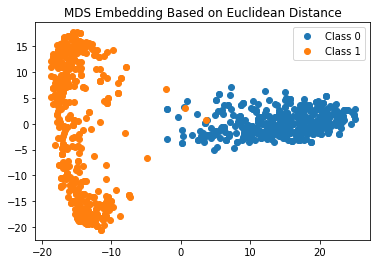

In [3]:
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx, 0], embed[idx, 1], 'o', label='Class %i' % i)
plt.legend()
plt.title('MDS Embedding Based on Euclidean Distance')
plt.show()

### K-means

Epoch 1 cluster distortion: 1463611.23561787
Epoch 2 cluster distortion: 1463548.23110425
Epoch 3 cluster distortion: 1463546.76242102
Epoch 4 cluster distortion: 1463549.68859157
Kmeans terminated after 4 iterations 

Final cluster distortion: 1463549.6886


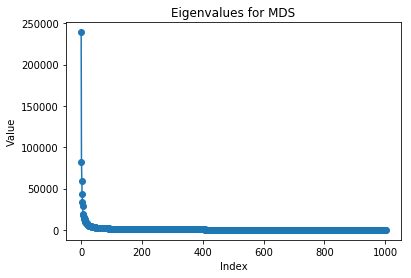

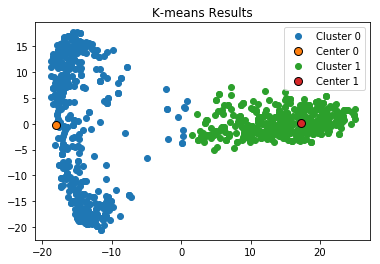

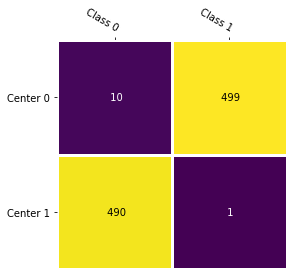

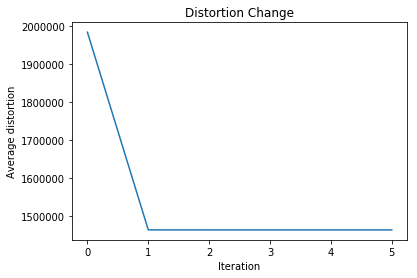

In [4]:
k = kmeans()
centers, klabels = k.fit(data, true_labels = labels, center_count=2, show_cluster_data=True, plot_results=True, numits=100)

Iteration 1 cluster distortion: 1469025.72299417
Iteration 2 cluster distortion: 1463704.66037041
Iteration 3 cluster distortion: 1463573.10960549
Iteration 4 cluster distortion: 1463573.10960549
LBG terminated after 4 iterations 

Final cluster distortion: 1463573.1096


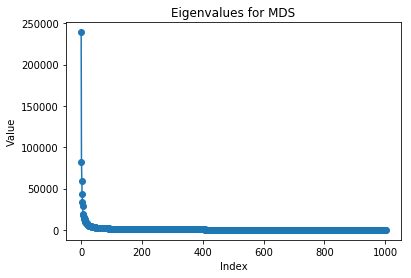

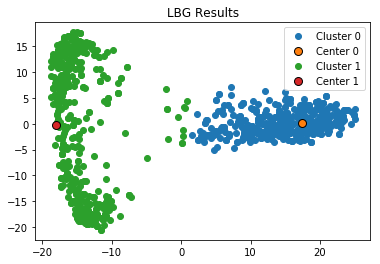

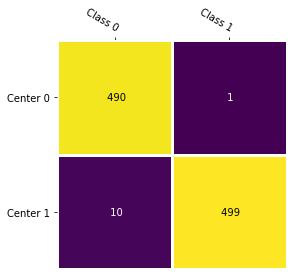

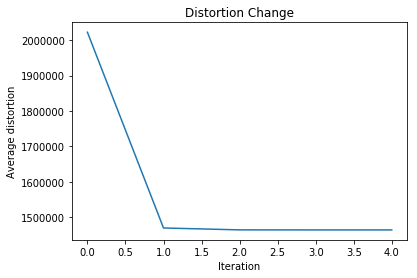

In [5]:
l = lbg()
centers, llabels = l.fit(data, center_count = 2, true_labels=labels, show_cluster_data=True, plot_results=True, numits=100)

### Grassmannian

In [6]:
sub, lbls = make_subspaces(data, labels, dim=1)

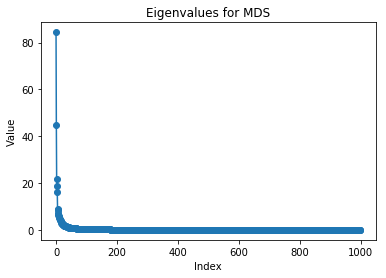

In [7]:
D = distances.chordal_distance(sub, sub)
embed = distances.mds(D, eigplot=True)

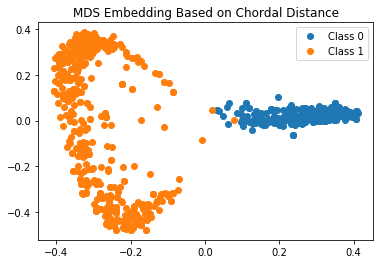

In [8]:
plt.figure()
for i in np.unique(lbls):
    idx = np.where(lbls == i)[0]
    plt.plot(embed[idx, 0], embed[idx,1], 'o', label='Class %i' % i)
plt.legend()
plt.title('MDS Embedding Based on Chordal Distance')
plt.show()

Kmeans terminated after 100 iterations 

Final cluster distortion: 392.7231


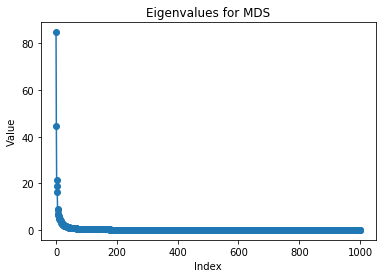

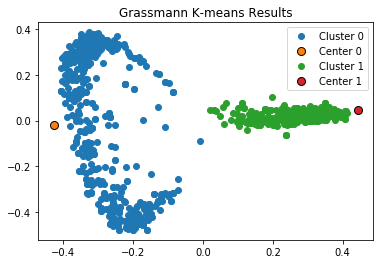

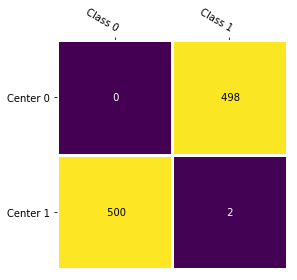

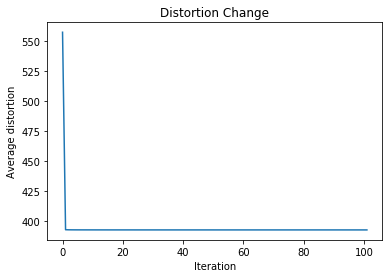

In [9]:
kmeans = gr_kmeans.gr_kmeans(verbosity=0)
kmeans_centers, kmeans_labels = kmeans.fit(sub, true_labels=lbls, center_count=2, plot_results=True, eigplot=True,
                                          show_cluster_data=True, numits=100)

LBG terminated after 3 iterations 

Final cluster distortion: 392.0556


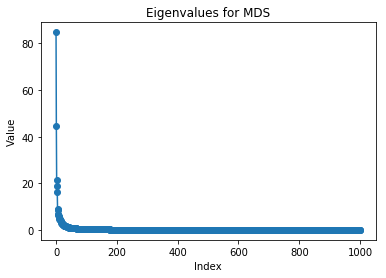

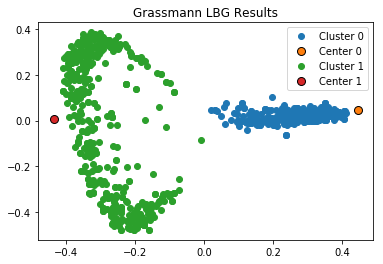

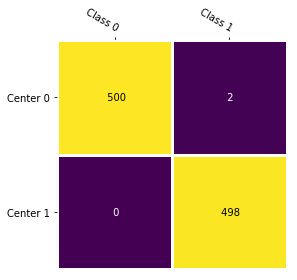

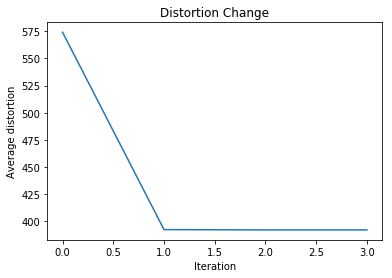

In [10]:
lbg = gr_lbg.gr_lbg(verbosity=0)
lbg_centers, lbg_labels = lbg.fit(sub, true_labels=lbls, center_count=2, plot_results=True, eigplot=True,
                                 show_cluster_data=True, numits=100)

In [11]:
sub, lbls = make_subspaces(data, labels, dim=2)

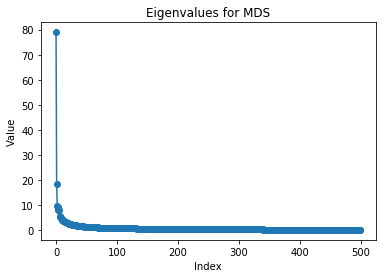

In [12]:
D = distances.chordal_distance(sub, sub)
embed = distances.mds(D, eigplot=True)

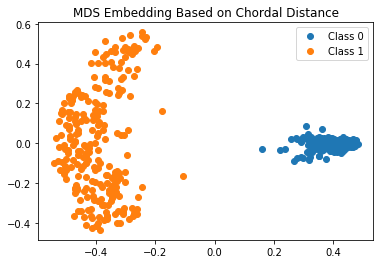

In [13]:
plt.figure()
for i in np.unique(lbls):
    idx = np.where(lbls == i)[0]
    plt.plot(embed[idx, 0], embed[idx,1], 'o', label='Class %i' % i)
plt.legend()
plt.title('MDS Embedding Based on Chordal Distance')
plt.show()

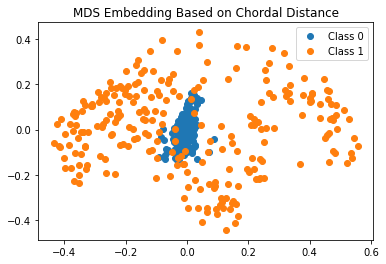

In [14]:
plt.figure()
for i in np.unique(lbls):
    idx = np.where(lbls == i)[0]
    plt.plot(embed[idx, 1], embed[idx,2], 'o', label='Class %i' % i)
plt.legend()
plt.title('MDS Embedding Based on Chordal Distance')
plt.show()

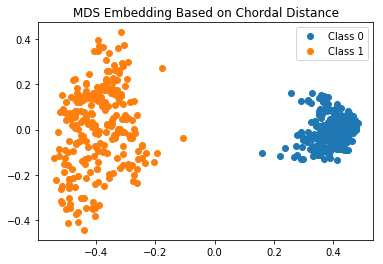

In [15]:
plt.figure()
for i in np.unique(lbls):
    idx = np.where(lbls == i)[0]
    plt.plot(embed[idx, 0], embed[idx,2], 'o', label='Class %i' % i)
plt.legend()
plt.title('MDS Embedding Based on Chordal Distance')
plt.show()

Kmeans terminated after 100 iterations 

Final cluster distortion: 464.4197


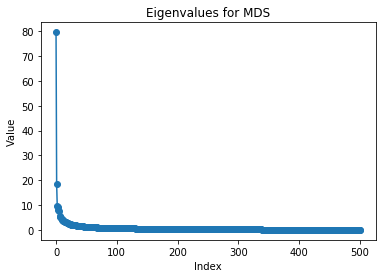

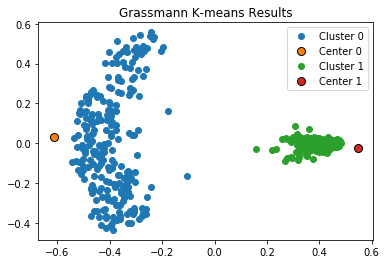

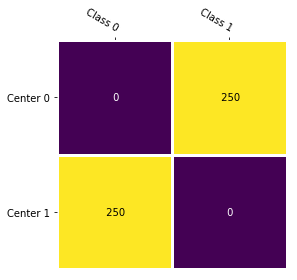

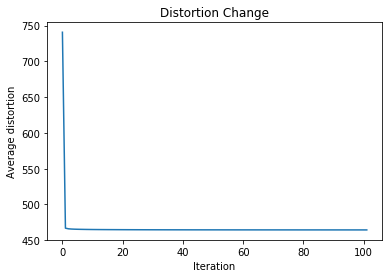

In [16]:
kmeans = gr_kmeans.gr_kmeans(verbosity=0)
kmeans_centers, kmeans_labels = kmeans.fit(sub, true_labels=lbls, center_count=2, plot_results=True, eigplot=True,
                                          show_cluster_data=True, numits=100)

LBG terminated after 3 iterations 

Final cluster distortion: 461.0221


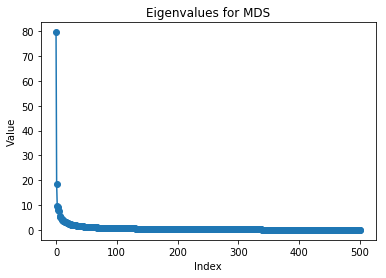

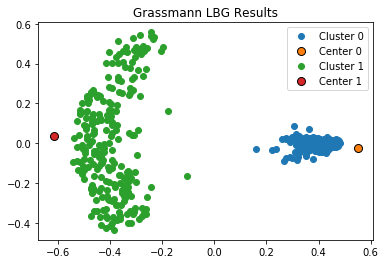

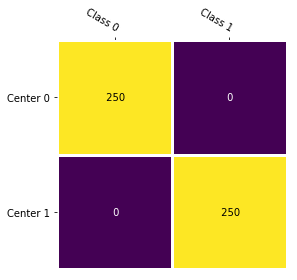

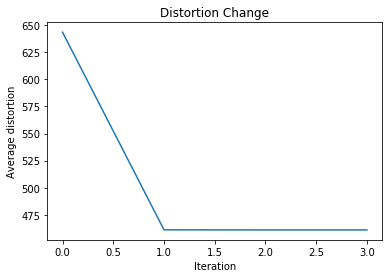

In [17]:
lbg = gr_lbg.gr_lbg(verbosity=0)
lbg_centers, lbg_labels = lbg.fit(sub, true_labels=lbls, center_count=2, plot_results=True, eigplot=True,
                                 show_cluster_data=True, numits=100)